
[==head()==]
   날짜  아메리카노  라떼  디저트  날씨
0  1일     50  30   20  맑음
1  2일     60  40   25  맑음
2  3일     55  35   18   비
3  4일     70  45   30  맑음
4  5일     65  38   28  흐림

[==info()==]
<class 'pandas.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   날짜      14 non-null     str  
 1   아메리카노   14 non-null     int64
 2   라떼      14 non-null     int64
 3   디저트     14 non-null     int64
 4   날씨      14 non-null     str  
dtypes: int64(3), str(2)
memory usage: 692.0 bytes
None

[==describe()==]
            아메리카노         라떼        디저트
count   14.000000  14.000000  14.000000
mean    81.642857  53.500000  39.714286
std     20.664377  15.356031  15.279089
min     50.000000  30.000000  18.000000
25%     66.250000  41.250000  28.500000
50%     82.500000  52.500000  39.000000
75%     93.750000  63.750000  48.750000
max    120.000000  80.000000  70.000000
0      100
1      225
2      333
3      478
4 

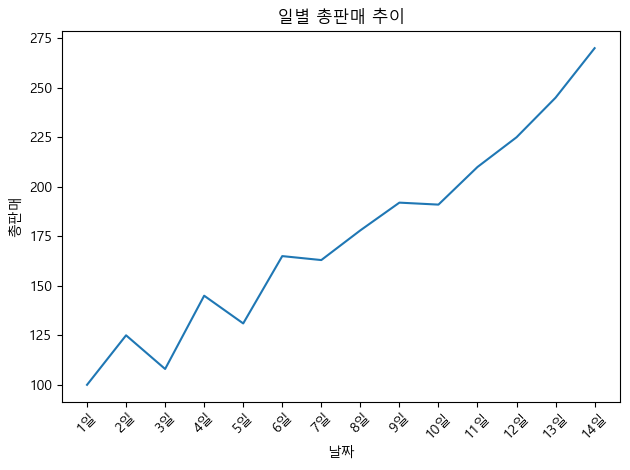

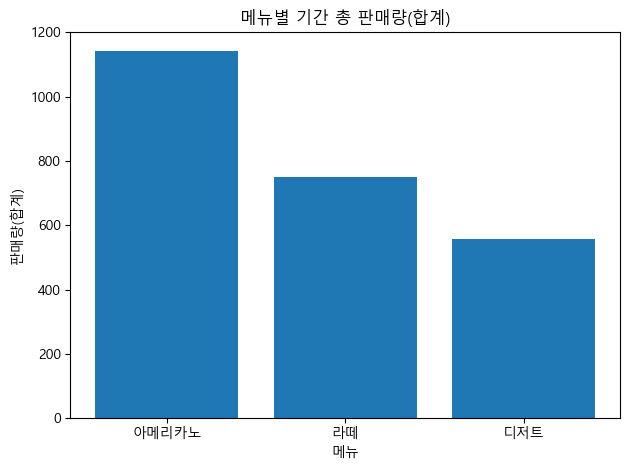

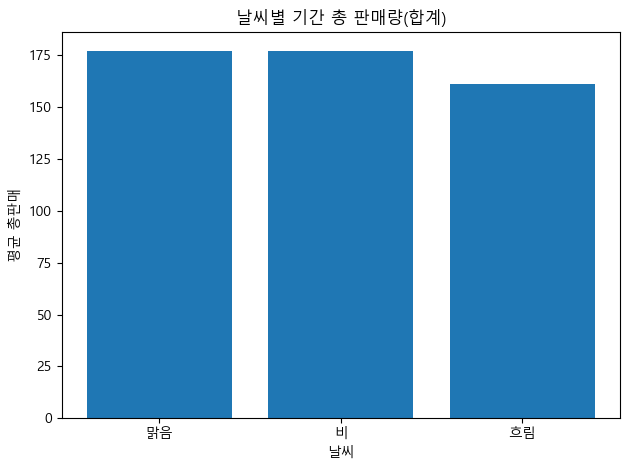

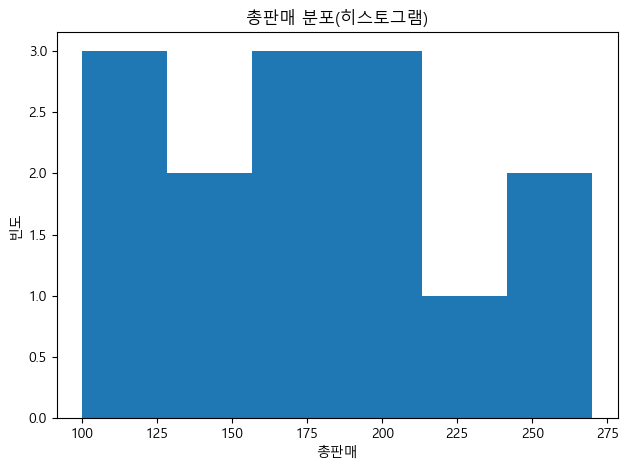

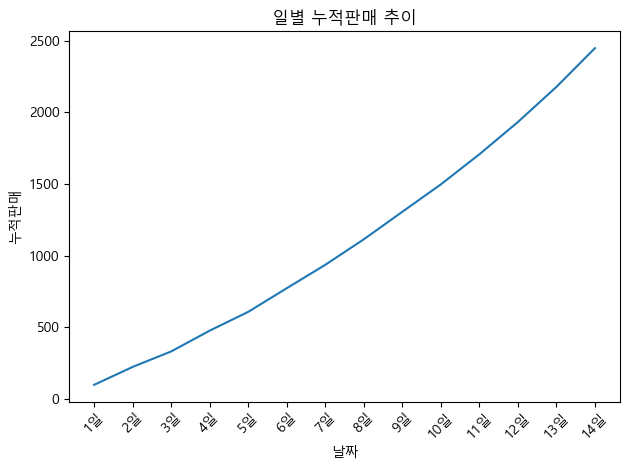


== 비오는날 평균 총 판매 : 177.00

== 비 안 오는날 평균 총 판매 : 174.27

== 차이(비 - 비 아님) : 2.73

== 기간 효자 메뉴 : 아메리카노 (총합) 1143) ==

== 변동성 코멘트 : 메출 변동성이 큰 편이라 원인(날씨/이벤트 등) 분석이 필요합니다 (std/mean = 0.28) ==

==전략 제안 3줄==
- 비 오는 날 매출이 낮은 경향이 있어, 우천 할인/배달 쿠폰 등 대응 전략이 필요합니다.
- 전체 기간 기준 효자 메뉴는 '아메리카노'로, 해당 메뉴를 중심으로 세트/업셀링 구성이 필요합니다.
- '아메리카노'와(과) '라떼'의 상관관계가 상대적으로 높아(=0.99), 함께 묶는 프로모션/세트 판매를 고려할 수 있습니다.
== 저장 완료 : cafe_sales_analysis_result.esy ==


In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# pandas 출력 옵션 (선택)
pd.set_option('display.width', 120) 
pd.set_option('display.max.columns', 50) 
pd.set_option('display.max.rows', 200) 

# 데이터 준비
data = {
    "날짜": [
        "1일","2일","3일","4일","5일","6일","7일",
        "8일","9일","10일","11일","12일","13일","14일"
    ],
    "아메리카노": [50,60,55,70,65,80,75,85,90,88,95,100,110,120],
    "라떼":       [30,40,35,45,38,50,48,55,60,58,65,70,75,80],
    "디저트":     [20,25,18,30,28,35,40,38,42,45,50,55,60,70],
    "날씨": [
        "맑음","맑음","비","맑음","흐림","맑음","맑음",
        "비","맑음","흐림","맑음","맑음","비","맑음"
    ],
}
# 2. 데이터 생김새
# 열 = 날짜, 아메리카노, 라떼, 디저트, 날씨
# 행 = 1일 ~ 14일 각 하루 데이터
df = pd.DataFrame(data)
print("\n[==head()==]")
print(df.head())

print("\n[==info()==]")
print(df.info())

print("\n[==describe()==]")
print(df[['아메리카노', '라떼', '디저트']].describe())

# 3. 데이터 가공

# df["컬럼명"] 문법
# - Dataframe에서 특정 컬럼을 선택하는 문법
# -
# -
# 3-1총 판매 만들기
# - 각 날짜별로 (행 별로) 아메리카노+라떼+디저트를 더함
# - pandas는 칼럼끼리 연산하면 자동으로 같은 행끼리 계산 됨
df["총판매"] = df['아메리카노'] + df['라떼'] + df['디저트']

# 3-2 누적 판매 만들기
# cumsum() 메서드
# 위에서부터 계속 더한 값
df['누적판매'] = df['총판매'].cumsum()
print(df['누적판매'])

# 3-3 전날 데비 변화량 만들기
# diff() 메서드
# difference = (현재값 - 이전값)
# 전날 대비 얼마나 늘었는지/줄었는지 확인 가능
# 첫날은 이전 값이 없어서 NaN이 나옴
df['총 판매 변화'] = df['총판매'].diff()

# 3-4 메뉴 비중 (일별)
# 
df['아메리카노 비중'] = df['아메리카노'] /df ['총판매']
df['라떼 비중'] = df['라떼'] /df ['총판매']
df['디저트 비중'] = df['디저트'] /df ['총판매']

print('==가공결과 미리보기==')
print(df)

# 4. 분석

# 4-1 최고/최저 매출일 찾기

max_cow = df.loc[df['총판매'].idxmax()]
max_row = df.loc[df['총판매'].idxmin()]

print('\n== 최저 매출일 ==')
print(max_row[['날씨', '아메리카노', '라떼', '디저트', '날짜']])

print('\n== 최고 매출일 ==')
print(max_cow[['날씨', '아메리카노', '라떼', '디저트', '날짜']])

# 4-2 평균/중앙 값

mean_total = df['총판매'].mean() # 평균
median_total = df['총판매'].median() # 중앙값

print(f"\n == 총판매 평균 : {mean_total:.2f} ==")
print(f"\n == 총판매 중앙값 : {median_total:.2f} ==")

# 4-3 날씨별 평균 총판매

weather_mean = df.groupby('날씨')['총판매'].mean().sort_values(ascending=False)
print('\n == 날씨별 총 판매 ==')
print(weather_mean)

# 4-4 메뉴별 합계/통계
menu_sum= df[['아메리카노', '라떼', '디저트' ]].sum().sort_values(ascending=False)
menu_mean = df[['아메리카노', '라떼', '디저트' ]].mean().sort_values(ascending=False)

print('\n == 메뉴별 합계 ==')
print(menu_sum)
print('\n == 메뉴별 통계 ==')
print(menu_mean)

# 4-5 변동성 : Numpy 사용
std_total = np.std(df['총판매'])
std_total_sample = np.std(df['총판매'], ddof=1)
print(f'\n == 총판매 표준편차(모집단, ddof = 0) {std_total:.2f}')
print(f'\n == 총판매 표준편차(모집단, ddof = 1) {std_total_sample:.2f}')

# 4-6 상관 관계(메뉴끼리)
corr_menu = df[['아메리카노', '라떼', '디저트']].corr()
print('\n == 메뉴 상관관계 ==')
print(corr_menu)

# 4-7 평균 이상인 날만 필터링
above_menu_df = df[df['총판매'] > mean_total]

print('\n == 총판매 평균 이상인 날 ==')
print(above_menu_df[['날짜','날씨', '총판매']])

# 4-8 성장 추세 
diff_menu = df[['아메리카노', '라떼', '디저트']].diff()
growth_score = diff_menu.sum().sort_values(ascending=False)

print('\n == 메뉴별 전날 대비 증가량 ==')
print(growth_score)

# 5 시각화
plt.figure()
plt.plot(df["날짜"], df['총판매'])
plt.title('일별 총판매 추이')
plt.xlabel('날짜')
plt.ylabel('총판매')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure()
plt.bar(menu_sum.index,menu_sum.values)
plt.title('메뉴별 기간 총 판매량(합계)')
plt.xlabel('메뉴')
plt.ylabel('판매량(합계)')
plt.tight_layout()
plt.show()

plt.figure()
plt.bar(weather_mean.index,weather_mean.values)
plt.title('날씨별 기간 총 판매량(합계)')
plt.xlabel('날씨')
plt.ylabel('평균 총판매')
plt.tight_layout()
plt.show()


plt.figure()
plt.hist(df['총판매'], bins=6)
plt.title('총판매 분포(히스토그램)')
plt.xlabel('총판매')
plt.ylabel('빈도')
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(df['날짜'], df['누적판매'])
plt.title('일별 누적판매 추이')
plt.xlabel('날짜')
plt.ylabel('누적판매')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6 인사이트 자동 생성

rain_mean = df[df['날씨'] == '비']['총판매'].mean()
non_rain_mean = df[df['날씨'] != '비']['총판매'].mean()

rain_gap = rain_mean - non_rain_mean
print(f"\n== 비오는날 평균 총 판매 : {rain_mean:.2f}")
print(f"\n== 비 안 오는날 평균 총 판매 : {non_rain_mean:.2f}")
print(f"\n== 차이(비 - 비 아님) : {rain_gap:.2f}")

top_menu = menu_sum.index[0]
top_menu_total = menu_sum.iloc[0]
print(f'\n== 기간 효자 메뉴 : {top_menu} (총합) {top_menu_total}) ==')

# 변동성 코멘트
cv = std_total / mean_total

if cv < 0.1:
    volatility_comment = '매출 변동성이 비교적 낮은 편입니다,'
elif cv < 0.2:
    volatility_comment = '매출 변동성이 보통 수준입니다.'
else :
    volatility_comment = '메출 변동성이 큰 편이라 원인(날씨/이벤트 등) 분석이 필요합니다'


print(f'\n== 변동성 코멘트 : {volatility_comment} (std/mean = {cv:.2f}) ==')

strategy = []
if rain_gap < 10:
    strategy.append('비 오는 날 매출이 낮은 경향이 있어, 우천 할인/배달 쿠폰 등 대응 전략이 필요합니다.')
else :
    strategy.append('비 오는 날에도 매출이 유지되거나 높은 편이라 우천일 프로모션을 강화도 좋습니다.')

strategy.append(f"전체 기간 기준 효자 메뉴는 '{top_menu}'로, 해당 메뉴를 중심으로 세트/업셀링 구성이 필요합니다.")

corr_pairs = []
cols = ['아메리카노', '라떼', '디저트']
for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        corr_pairs.append((cols[i], cols[j], corr_menu.loc[cols[i], cols[j]]))
        
corr_pairs.sort(key=lambda x: x[2], reverse=True)
best_pair = corr_pairs[0]

strategy.append(
    f"'{best_pair[0]}'와(과) '{best_pair[1]}'의 상관관계가 상대적으로 높아(={best_pair[2]:.2f}), "
    "함께 묶는 프로모션/세트 판매를 고려할 수 있습니다."
)

print('\n==전략 제안 3줄==')
for s in strategy:
    print(f"- {s}")

# 저장
output_path = 'cafe_sales_analysis_result.esy'
df.to_csv(output_path, index=False, encoding="utf-8-sig")

print(f"== 저장 완료 : {output_path} ==")